2023-03-27 00:51:30.531834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-27 00:51:30.532169: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-27 00:51:30.532265: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-27 00:51:30.532345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-27 00:51:30.532426: W tensorflow/c

1/1 [==============================] - 0s 480ms/step


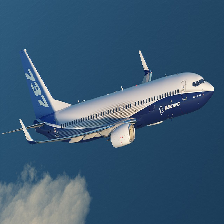

[[('n02690373', 'airliner', 0.65863454)]]
1/1 [==============================] - 0s 148ms/step


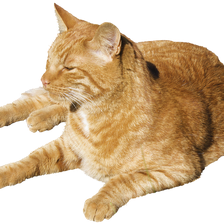

[[('n02124075', 'Egyptian_cat', 0.18817215)]]
1/1 [==============================] - 0s 153ms/step


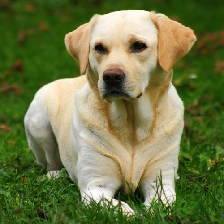

[[('n02099712', 'Labrador_retriever', 0.416939)]]
1/1 [==============================] - 0s 156ms/step


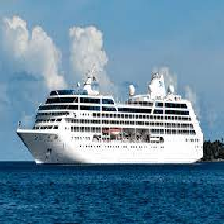

[[('n03673027', 'liner', 0.9996662)]]


In [34]:
from keras.datasets import cifar10
from keras.applications import vgg16
from random import randint
import requests
import numpy as np
import io
import sys
import matplotlib.pyplot as plt
from keras.utils.image_utils import load_img,img_to_array
import matplotlib.pyplot as plt


def load_data(images):
    result = []
    
    for filename in images:
        image = load_img(filename,target_size=(224,224))
        result.append((image, img_to_array(image)))
    return result
        

dataset = load_data(["images/airplane.jpg","images/cat.png","images/dog.jpg", "images/ship.jpg"])

len(dataset)

model = vgg16.VGG16()


def predict(dataset):
    for i,(image,sample) in enumerate(dataset):
        input = sample.reshape((-1,224,224,3))
        output = model.predict(input)
        pred = vgg16.decode_predictions(output,top=1)
        display(image)
        print(pred)
        
predict(dataset)

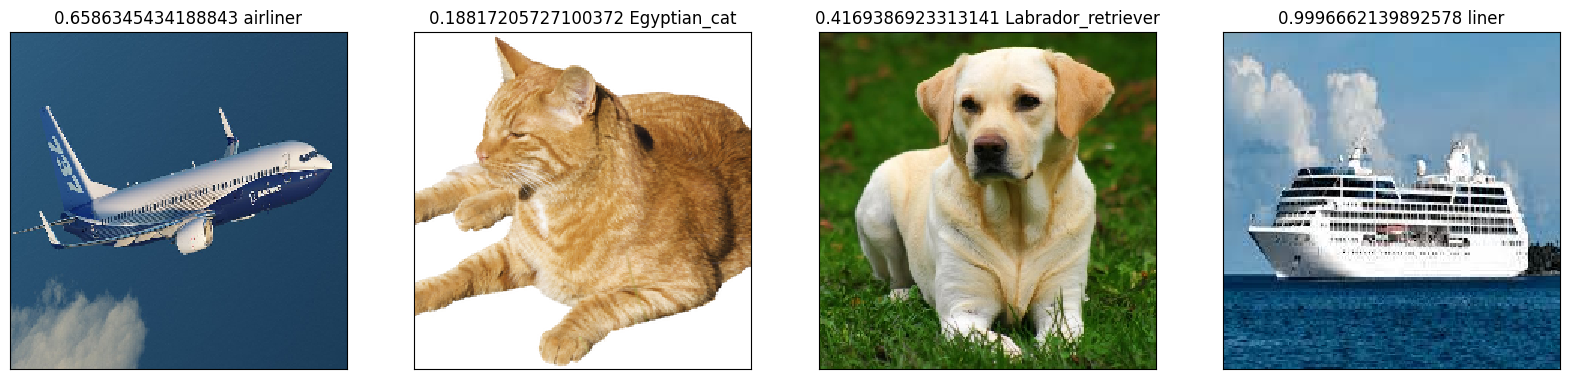

In [46]:
from random import randint
import requests
import numpy as np
import io
import sys
import matplotlib.pyplot as plt
from keras.utils.image_utils import load_img,img_to_array
import matplotlib.pyplot as plt
import lz4

def load_data(images):
    result = []
    for filename in images:
        image = load_img(filename,target_size=(224,224))
        result.append((image, img_to_array(image)))
    return result

def papdl_predict(dataset):
    fix,ax = plt.subplots(nrows=1,ncols=len(dataset),figsize=(20,20))
    for i,(image,sample) in enumerate(dataset):
        input = sample.reshape((-1,224,224,3))
        buff = io.BytesIO()
        np.save(buff,input)
        buff.seek(0)
        response = requests.post("http://localhost:8765/input",data=buff.read(), verify=False, stream=True)
        result_buff = io.BytesIO()
        result_buff.write(response.content)
        result_buff.seek(0)
        result_np = np.load(result_buff)
        pred = vgg16.decode_predictions(result_np,top=1)
        # display(image)
        ax[i].imshow(sample.astype("uint8"),interpolation="nearest")
        ax[i].get_xaxis().set_visible(False)
        ax[i].get_yaxis().set_visible(False)
        ax[i].set_title(f"{pred[0][0][2]} {pred[0][0][1]}")

papdl_predict(dataset)

1/1 [==============================] - 0s 173ms/step


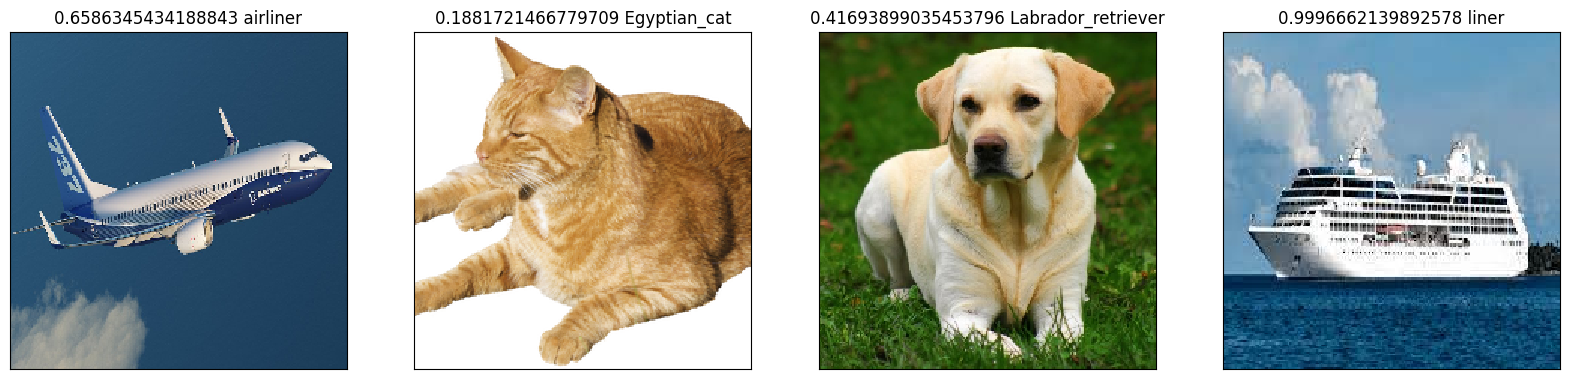

In [48]:
from random import randint
import requests
import numpy as np
import io
import sys
import matplotlib.pyplot as plt
from keras.utils.image_utils import load_img,img_to_array
import matplotlib.pyplot as plt
import lz4

def load_data(images):
    result = []
    for filename in images:
        image = load_img(filename,target_size=(224,224))
        result.append((image, img_to_array(image)))
    return result

def papdl_predict(dataset):
    fig,ax = plt.subplots(nrows=1,ncols=len(dataset),figsize=(20,20))
    for i,(image,sample) in enumerate(dataset):
        input = sample.reshape((-1,224,224,3))
        output = model.predict(input)
        pred = vgg16.decode_predictions(output,top=1)
        ax[i].imshow(sample.astype("uint8"),interpolation="nearest")
        ax[i].get_xaxis().set_visible(False)
        ax[i].get_yaxis().set_visible(False)
        ax[i].set_title(f"{pred[0][0][2]} {pred[0][0][1]}")

    fig.suptitle("Local Prediction")

papdl_predict(dataset)